# Preparing data for machine learning

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

csv = "https://www.sjsu.edu/people/wendy.lee/docs/CS185C02-Sp21/heart_disease_clinical_data.csv"
heart = pd.read_csv(csv)
heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


We convert datatype of 'age' column into integer

In [ ]:
heart['age'] = heart.age.astype(int)
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


We check the data for any null values or any zero values.

In [ ]:
heart.isnull().values.any()
(heart == 0).sum()

age                           0
anaemia                     170
creatinine_phosphokinase      0
diabetes                    174
ejection_fraction             0
high_blood_pressure         194
platelets                     0
serum_creatinine              0
serum_sodium                  0
sex                         105
smoking                     203
time                          0
DEATH_EVENT                 203
dtype: int64

In [ ]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Data preprocessing, analysis and visualisation

### **1.**

Text(0.5, 1.0, 'Relationship between time between follow up and death event')

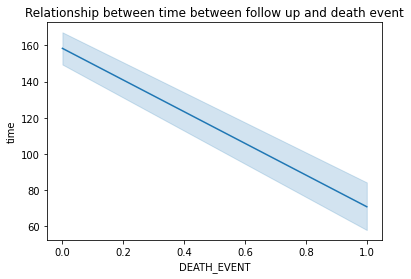

In [ ]:
lineplot = sns.lineplot(data = heart, x= "DEATH_EVENT", y = "time")
lineplot.set_title('Relationship between time between follow up and death event')

We form a lineplot to find relation between time and death event. The lineplot shows that shorter the time between visits, the higher is the chance of a patient dying.

### **2.**

Text(0.5, 1.0, 'Boxplot for ages of patients who died')

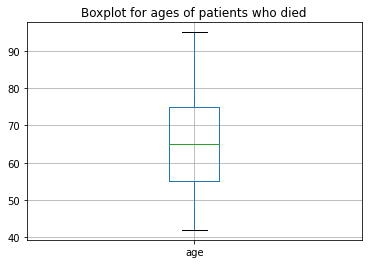

In [ ]:
heart_deaths = heart[heart['DEATH_EVENT'] == 1]
age_boxplot = heart_deaths.boxplot(column = ['age'])
age_boxplot.set_title("Boxplot for ages of patients who died")

We create a boxplot to find the median and quartile ranges for people who died from heart diseases. From the boxplot it is evident that the people who died from heart failure were fairly older with a median age of around 65 

In [ ]:
heart['age'].describe()

count    299.000000
mean      60.829431
std       11.894997
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

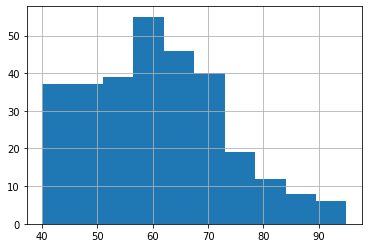

In [ ]:
heart['age'].hist()

Since mean, lower and upper quartiles are really close together and most of the people who died were around median age, we try to preprocess age column by removing some outliers. Here we chop of 2% of the data

count    299.000000
mean      60.724816
std       11.631923
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       87.120000
Name: age, dtype: float64

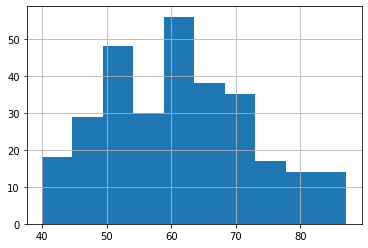

In [ ]:
x = heart['age']
UPPERBOUND, LOWERBOUND = np.percentile(x, [2,98])
heart['age'] = np.clip(x, UPPERBOUND, LOWERBOUND)
heart['age'].hist()
heart['age'].describe()

### **3.**

Text(0.5, 1.0, 'Scatterplot showing relation between ejection fraction and serum creatinine for different age groups')

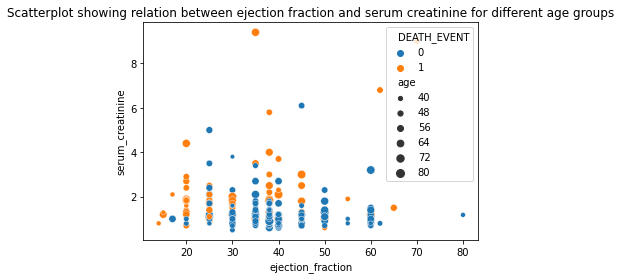

In [ ]:
 scatterplot = sns.scatterplot(data=heart, x="ejection_fraction", y="serum_creatinine", hue="DEATH_EVENT", size = "age")
scatterplot.set_title("Scatterplot showing relation between ejection fraction and serum creatinine for different age groups")

From the scatterplot we learn that patients with low levels of ejection fraction and serum creatinine were very likely to die regardless of the age group they belonged to. Patients with a very higher levels of serum creatinine (above 2) were much more likely to die as well.

### **4.**

Text(0.5, 1.0, 'Bar plot showing count of patients suffering from ailments prior to death')

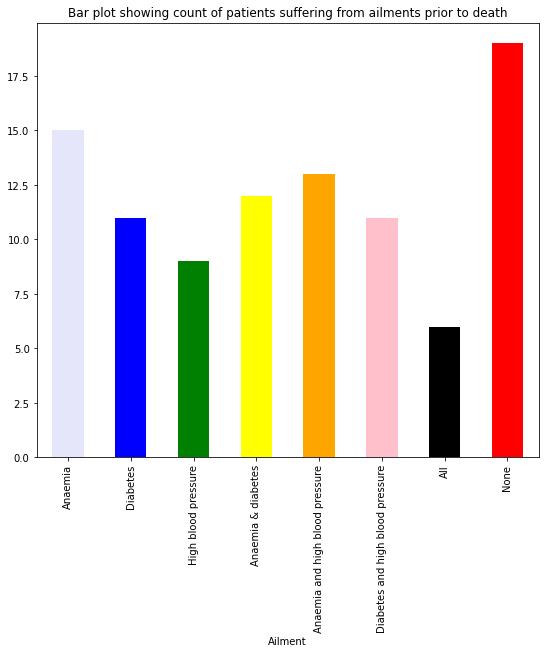

In [ ]:
ailments_all = heart[['anaemia', 'diabetes','high_blood_pressure','DEATH_EVENT']]
ailments = ailments_all[ailments_all['DEATH_EVENT']== 1]

anaemia = ailments[(ailments['anaemia']== 1) & (ailments['diabetes']==0) & (ailments['high_blood_pressure']== 0)]
anaemia_count = len(anaemia.index)

diabetes = ailments[(ailments['anaemia']== 0) & (ailments['diabetes']==1) & (ailments['high_blood_pressure']== 0)]
diabetes_count = len(diabetes.index)

highbp = ailments[(ailments['anaemia']== 0) & (ailments['diabetes']==0) & (ailments['high_blood_pressure']== 1)]
highbp_count = len(highbp.index)

anaemia_and_diabetes = ailments[(ailments['anaemia']== 1) & (ailments['diabetes']==1) & (ailments['high_blood_pressure']== 0)]
anaemia_and_diabetes_count = len(anaemia_and_diabetes.index)

anaemia_and_highbp = ailments[(ailments['anaemia']== 1) & (ailments['diabetes']==0) & (ailments['high_blood_pressure']== 1)]
anaemia_and_highbp_count = len(anaemia_and_highbp.index)

diabetes_and_highbp = ailments[(ailments['anaemia']== 0) & (ailments['diabetes']==1) & (ailments['high_blood_pressure']== 1)]
diabetes_and_highbp_count = len(diabetes_and_highbp.index)

all_ailments = ailments[(ailments['anaemia']== 1) & (ailments['diabetes']==1) & (ailments['high_blood_pressure']== 1)]
all_ailments_count = len(all_ailments.index)

none_ailments = ailments[(ailments['anaemia']== 0) & (ailments['diabetes']==0) & (ailments['high_blood_pressure']== 0)]
none_ailments_count = len(none_ailments.index)

data =[['Anaemia', anaemia_count], ['Diabetes', diabetes_count],['High blood pressure', highbp_count],
     ['Anaemia & diabetes', anaemia_and_diabetes_count],['Anaemia and high blood pressure', anaemia_and_highbp_count], 
     ['Diabetes and high blood pressure', diabetes_and_highbp_count], ['All', all_ailments_count], ['None', none_ailments_count]]
df = pd.DataFrame(data, columns=['Ailment','count'])
bargraph = df.plot.bar(y = 'count',x = 'Ailment', 
                       color=['lavender', 'blue', 'green', 'yellow', 'orange', 'pink', 'black', 'red'], 
                       figsize = (9,8), legend= False)
bargraph.set_title('Bar plot showing count of patients suffering from ailments prior to death')

Bar plot shows that despite majority of the people who died from heart diesease had some sort of ailment, there was higher number of deaths among people who didn't suffer from any ailment.
We can argue that ailments like anaemia, diabetes and high blood pressure aren't really that big of a factors for causing death.

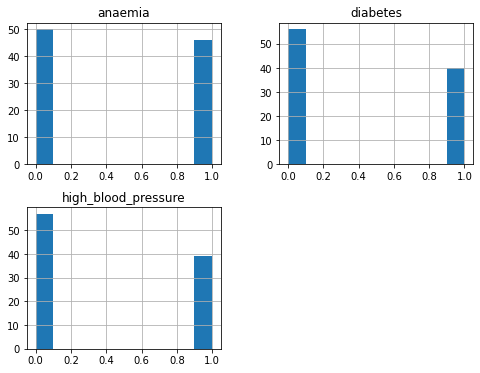

In [ ]:
hist = ailments.drop(columns= 'DEATH_EVENT').hist(figsize= (8,6))

From the histogram we can see that there isn't ailments like anaemia, diabetes and high blood pressure didn't really cause the death of a heart patient as much as we'd expect. We learn and conclude that ailments aren't the biggest factors in causing death.

### **5.**

Finding correlation between death event and other factors

In [ ]:
corr_matrix = heart.corr()
corr_matrix["DEATH_EVENT"].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.247992
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

Text(0.5, 1.0, 'Heatmap of correlation matrix of our data')

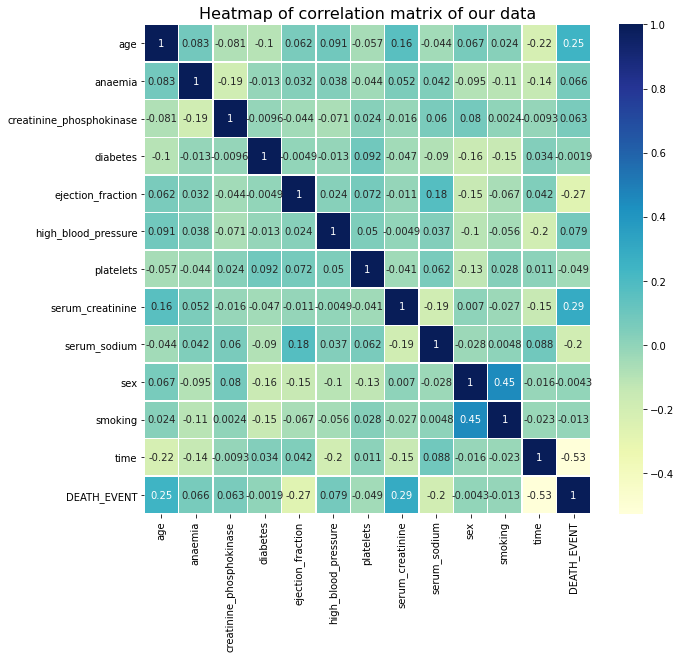

In [ ]:
plt.figure(figsize = (10,9))
heatmap = sns.heatmap(corr_matrix, linewidths= 0.5, linecolor= 'white', annot=True, cmap="YlGnBu")
heatmap.set_title('Heatmap of correlation matrix of our data', fontsize= 16)

Heatmap helps us to put a lot of things into perspective. We can see that age, ejection fraction, serum creatinine and time between follow up to the doctor are the most important factors in determining death of a heart patient.

### **6.**

We now try to scale the numerical data of columns having a huge difference between their minimum and maximum values. We use standard scaling for serumcreatinine levels, platelet count and ejection fraction

In [ ]:
heart['serum_creatinine'] = StandardScaler().fit_transform(heart['serum_creatinine'].values.reshape(-1,1))
heart['platelets'] = StandardScaler().fit_transform(heart['platelets'].values.reshape(-1,1))
heart['ejection_fraction'] = StandardScaler().fit_transform(heart['ejection_fraction'].values.reshape(-1,1))
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,-1.530560,1,1.681648e-02,0.490057,130,1,0,4,1
1,55.0,0,7861,0,-0.007077,0,7.535660e-09,-0.284552,136,1,0,6,1
2,65.0,0,146,0,-1.530560,0,-1.038073e+00,-0.090900,129,1,1,7,1
3,50.0,1,111,0,-1.530560,0,-5.464741e-01,0.490057,137,1,0,7,1
4,65.0,1,160,1,-1.530560,0,6.517986e-01,1.264666,116,0,0,8,1


**Data has been preprocessed and analysed using visualisation plots and is ready to be used for training and testing**

#Divide the data for training and testing purposes.

In [ ]:
X = heart.drop(['DEATH_EVENT'], axis=1)
y = heart['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training and evaluation of different ML classifiers

**1.** **Logistic Regression**

In [ ]:
logreg = LogisticRegression(max_iter= 1000)
clf = logreg.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv= 10)
y_pred = logreg.predict(X_test)
print("Logistic regression accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()*2))

Logistic regression accuracy: 0.8279 (+/- 0.1840)


**2.** **Random Forest Classifier**

In [ ]:
RF = RandomForestClassifier(max_depth=2).fit(X_train, y_train)
scores = cross_val_score(RF, X_train, y_train, cv= 10)
print("Random Forest Classifier accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()*2))

Random Forest Classifier accuracy: 0.8453 (+/- 0.1535)


**3. Neural Network**

In [ ]:
mlp = MLPClassifier(solver='lbfgs', alpha= 1e-5, hidden_layer_sizes=(5,2), random_state=42)
NN= mlp.fit(X_train, y_train)
scores = cross_val_score(NN, X_train, y_train, cv= 10)
print("Neural Network accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()*2))

Neural Network accuracy: 0.7029 (+/- 0.0253)


# Fine tuning for better accuracy

Logistic Regression with Grid Search


In [ ]:
param_grid = [
    {'C': [1,10,20, 30],
     'intercept_scaling':[1.0, 5.0]}
  ]

clf_grid = LogisticRegression(random_state=0, solver='liblinear', max_iter= 1000)
grid_search = GridSearchCV(clf_grid, param_grid, cv=5,
                           scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_
grid_search.best_estimator_
final_modal = grid_search.best_estimator_
print("Logistic regression with grid search accuracy: %0.4f" % final_modal.score(X_train, y_train))

Logistic regression with grid search accuracy: 0.8745


# ROC curve

Text(0.5, 0.98, 'ROC curve for different classifiers')

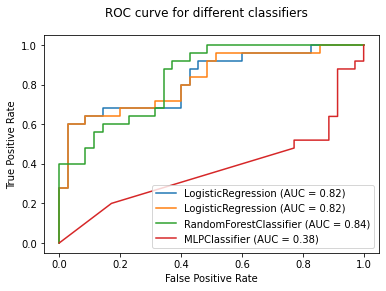

In [ ]:
lrc_disp = plot_roc_curve(final_modal, X_test, y_test)
lr_disp = plot_roc_curve(clf, X_test, y_test, ax = lrc_disp.ax_)
rfc_disp = plot_roc_curve(RF, X_test, y_test, ax = lrc_disp.ax_)
nn_disp = plot_roc_curve(NN, X_test, y_test, ax = lrc_disp.ax_)
lrc_disp.figure_.suptitle('ROC curve for different classifiers')

From the ROC curve and from the ML classifiers we used, logistic regression with grid search is the most accurate one. Hence we will be using that for our testing model

# Testing the best model and conclusion

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60

Confusion matrix:
[[34  1]
 [11 14]]


Text(0.5, 1.0, 'Heatmap of confusion matrix')

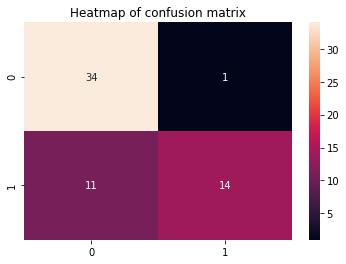

In [ ]:
model = grid_search.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
plt.title('Heatmap of confusion matrix')

In [ ]:
pd.DataFrame({'Actual':list(y_test),'Predicted':list(y_pred)})

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0


In [ ]:
from sklearn.metrics import accuracy_score,f1_score
print("Accuracy : ",accuracy_score(y_test,y_pred)*100,"%")

Accuracy :  80.0 %


### **Conclusion:** Classification model based on the features for the prediction of death event for heart patients has been done with accuracy an 80% 
 

Link for video presentation given here
https://youtu.be/-_GPVXUSzLY 